# Computational Linear Algebra: PCA Homework

## Initialization:
Fill the missing values in this text box and in the following code-cell.

**Academic Year:** 2024/2025

### Team Members (Alphabetical Order):
1. Galano, Marco (338658);

In [1]:
StudentID1 = 338658  # <-------- Fill in the missing value
# StudentID2 = ...  # <-------- Fill in the missing value

## Starting Code-Cell 
### Attention: DO NOT CHANGE THE CODE INSIDE THE FOLLOWING CELL!

In [2]:
####################################################################
############## DO NOT CHANGE THE CODE IN THIS CELL #################
####################################################################

import numpy as np

var_entertainment_feat_types = ['Interests', 'Movies', 'Music']
var_personal_feat_types = ['Finance', 'Phobias']
fixed_feat_types = ['Personality', 'Health']

label_types = ['Demographic']

variables_by_type = {
    'Demographics': ['Age', 'Height', 'Weight', 'Number of siblings', 
                     'Gender', 'Hand', 'Education', 'Only child', 'Home Town Type',
                     'Home Type'],
    'Finance': ['Finances', 'Shopping centres', 'Branded clothing', 
                'Entertainment spending', 'Spending on looks', 
                'Spending on gadgets', 'Spending on healthy eating'],
    'Health': ['Smoking', 'Alcohol', 'Healthy eating'],
    'Interests': ['History', 'Psychology', 'Politics', 'Mathematics', 
                  'Physics', 'Internet', 'PC', 'Economy Management', 
                  'Biology', 'Chemistry', 'Reading', 'Geography', 
                  'Foreign languages', 'Medicine', 'Law', 'Cars', 
                  'Art exhibitions', 'Religion', 'Countryside, outdoors', 
                  'Dancing', 'Musical instruments', 'Writing', 'Passive sport', 
                  'Active sport', 'Gardening', 'Celebrities', 'Shopping', 
                  'Science and technology', 'Theatre', 'Fun with friends', 
                  'Adrenaline sports', 'Pets'],
    'Movies': ['Movies', 'Horror', 'Thriller', 'Comedy', 'Romantic', 
               'Sci-fi', 'War', 'Fantasy/Fairy tales', 'Animated', 
               'Documentary', 'Western', 'Action'],
    'Music': ['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 
              'Country', 'Classical music', 'Musical', 'Pop', 'Rock', 
              'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska', 
              'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 
              'Techno, Trance', 'Opera'],
    'Personality': ['Daily events', 'Prioritising workload', 
                    'Writing notes', 'Workaholism', 'Thinking ahead', 
                    'Final judgement', 'Reliability', 'Keeping promises', 
                    'Loss of interest', 'Friends versus money', 'Funniness', 
                    'Fake', 'Criminal damage', 'Decision making', 'Elections', 
                    'Self-criticism', 'Judgment calls', 'Hypochondria', 
                    'Empathy', 'Eating to survive', 'Giving', 
                    'Compassion to animals', 'Borrowed stuff', 
                    'Loneliness', 'Cheating in school', 'Health', 
                    'Changing the past', 'God', 'Dreams', 'Charity', 
                    'Number of friends', 'Punctuality', 'Lying', 'Waiting', 
                    'New environment', 'Mood swings', 'Appearence and gestures', 
                    'Socializing', 'Achievements', 'Responding to a serious letter', 
                    'Children', 'Assertiveness', 'Getting angry', 
                    'Knowing the right people', 'Public speaking', 
                    'Unpopularity', 'Life struggles', 'Happiness in life', 
                    'Energy levels', 'Small - big dogs', 'Personality', 
                    'Finding lost valuables', 'Getting up', 'Interests or hobbies', 
                    "Parents' advice", 'Questionnaires or polls', 'Internet usage'],
    'Phobias': ['Flying', 'Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes', 
                'Rats', 'Ageing', 'Dangerous dogs', 'Fear of public speaking']
}

labels = variables_by_type['Demographics']

try:
    random_seed = min([StudentID1, StudentID2])
except NameError:
    random_seed = StudentID1

def which_featgroups():
    np.random.seed(random_seed)
    these_entertainments = np.random.choice(var_entertainment_feat_types, 2, replace=False).tolist()
    these_personal = np.random.choice(var_personal_feat_types, 1, replace=False).tolist()
    these_types = fixed_feat_types + these_personal + these_entertainments
    print('*** THESE ARE THE SELECTED TYPE OF VARIABLES:')
    for k in these_types:
        print(f'{k}')
    print('*************************************')
    return these_types

def which_features(these_types):
    np.random.seed(random_seed)
    these_features = []
    for type in these_types:
        if type != 'Personality':
            these_features += variables_by_type[type]
        else:
            these_features += np.random.choice(variables_by_type[type], 
                                               int(2 * (len(variables_by_type[type]) / 3)), 
                                               replace=False).tolist()
    print('*** THESE ARE THE SELECTED FEATURES:')
    for ft in these_features:
        print(f'{ft}')
    print('*************************************')
    return these_features

these_types = which_featgroups()
these_features = which_features(these_types)

np.random.seed(random_seed)

*** THESE ARE THE SELECTED TYPE OF VARIABLES:
Personality
Health
Phobias
Movies
Interests
*************************************
*** THESE ARE THE SELECTED FEATURES:
Final judgement
Cheating in school
Assertiveness
Health
Judgment calls
Socializing
Small - big dogs
Daily events
Loneliness
Unpopularity
Energy levels
Interests or hobbies
Dreams
Questionnaires or polls
Keeping promises
Finding lost valuables
Punctuality
Workaholism
Criminal damage
Life struggles
Giving
Getting angry
Compassion to animals
Reliability
Elections
Knowing the right people
Self-criticism
Decision making
Writing notes
Appearence and gestures
Children
Charity
Changing the past
Number of friends
Getting up
Hypochondria
Achievements
Fake
Smoking
Alcohol
Healthy eating
Flying
Storm
Darkness
Heights
Spiders
Snakes
Rats
Ageing
Dangerous dogs
Fear of public speaking
Movies
Horror
Thriller
Comedy
Romantic
Sci-fi
War
Fantasy/Fairy tales
Animated
Documentary
Western
Action
History
Psychology
Politics
Mathematics
Physics
In

## Importing Modules

In the following cell, import all the modules you think are necessary for doing the homework, **among the ones listed and used during the laboratories of the course**.
No extra modules are allowed for reproducibility.

In [3]:
# DO NOT IMPORT NUMPY
# import ...
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

%matplotlib widget

## Exercise 1. Preparing the Dataset

In the cells below, do the following operations:
1. load the dataset "_responses_hw.csv_";
2. create a working dataframe extracting from _responses_hw.csv_ the columns corresponding to the variables in _these_features_, and randomly selecting 2/3 of the rows. Let us call this dataframe _X_df_;
3. analyze the obtained dataframe and performing cleansing/encoding operations.

In [4]:
df=pd.read_csv("responses_hw.csv")

#selects only the columns correspondent to the randomly chosen features
X_df=df[these_features] 

#randomly selects a subset of indices
indices_choice=np.random.choice(df.index, size=int(2*df.shape[0]/3), replace=False) 
X_df=X_df.iloc[indices_choice] #selects only the rows of the randomly chosen indices

categorical_categories = X_df.select_dtypes(exclude=np.number).columns
print(categorical_categories)

for cat in categorical_categories:
    print(f"Values for {cat} are: {X_df[cat].unique()}")

#I use labels encoding as it is said that data can be considered ordered
smoking_labels={"never smoked":0,"tried smoking":1,
                "former smoker":2, "current smoker":3}
X_df["Smoking"]=[smoking_labels.get(res,np.nan) for res in X_df["Smoking"]]

alcohol_labels={"never":0,"social drinker":1,"drink a lot":2}
X_df["Alcohol"]=[alcohol_labels.get(res,np.nan) for res in X_df["Alcohol"]]

punctuality_labels={"early":0,"on time":1,"late":2}
X_df["Punctuality"]=[punctuality_labels.get(res,np.nan) 
                     for res in X_df["Punctuality"]]

print(X_df.shape)
#this is the total of missing values in each column of the dataframe
print(X_df.isnull().sum().sort_values()) 

# I drop all the rows where there are missing values.
X_df=X_df.dropna(axis=0, how="any")
print(X_df.shape) #The dataset is still well populated to perform a PCA

Index(['Punctuality', 'Smoking', 'Alcohol'], dtype='object')
Values for Punctuality are: ['early' 'on time' 'late']
Values for Smoking are: ['tried smoking' 'current smoker' 'former smoker' nan 'never smoked']
Values for Alcohol are: ['social drinker' 'drink a lot' 'never' nan]
(673, 95)
Health             0
Dreams             0
Punctuality        0
Dangerous dogs     0
Storm              0
                  ..
Theatre            6
Geography          6
Writing            6
Chemistry          8
Passive sport     13
Length: 95, dtype: int64
(517, 95)


## Data Preparation

After having loaded the responses to the survey, we do the following operations:
1. Select only the columns corresponding to the randomly chosen features;
2. Select a random subset of indices from the dataframe obtained in the previous step, the size of this subset is equal to two-thirds of the original size;
3. Find all the categorical values in the dataframe; in this case they are **Punctuality**, **Smoking** and **Alcohol**. Then we look at how these responses are encoded in the dataframe, and we use **Label Encoding** to obtain numerical values for these responses. We can use this technique as the responses can be assumed as ordered;
4. Finally, we perform the cleansing of the missing values in the dataframe. First we check the shape of the dataframe. After that, we try to remove all the rows where there is at least one missing value. After this we check again the shape of the dataframe, and we see that this final result is still well populated in order to perform the PCA. The approach of not imputing anything on the responses is preferred as our knowledge of the domain is not that profound. Also, having checked how many missing values there are for each column we decided not to drop any column, as the number of missing values is very small compared to the number of rows.

## Exercise 2. Analyzing the Variance and the PCs

In the cells below, do the following operations:
1. create two new dataframes from _X_df_ applying a StandardScaler and a MinMaxscaler. Call these new dataframes as _Xstd_df_ and _Xmm_df_, respectively;
2. compute the variance of all the features in _X_df_, _Xstd_df_, and _Xmm_df_ and **comment the results**;
3. compute all the $n$ Principal Components (PCs) for each dataset _X_df_, _Xstd_df_, and _Xmm_df_. Then, visualize the curves of the cumulative explained variances and **comment the results**.

---     VARIANCE FOR X_df     ---
Alcohol             0.340246
Movies              0.430053
Dreams              0.473925
Comedy              0.571919
Fun with friends    0.579731
                      ...   
Pets                2.269159
Criminal damage     2.306044
Spiders             2.344122
Active sport        2.357909
Elections           2.434633
Length: 95, dtype: float64
---------------------------------
---   VARIANCE FOR Xstd_df    ---
Alcohol                    1.001938
Socializing                1.001938
Hypochondria               1.001938
Charity                    1.001938
Comedy                     1.001938
                             ...   
Questionnaires or polls    1.001938
Getting angry              1.001938
Theatre                    1.001938
Punctuality                1.001938
Action                     1.001938
Length: 95, dtype: float64
---------------------------------
---    VARIANCE FOR Xmm_df    ---
Movies              0.026878
Dreams              0.029620
Com

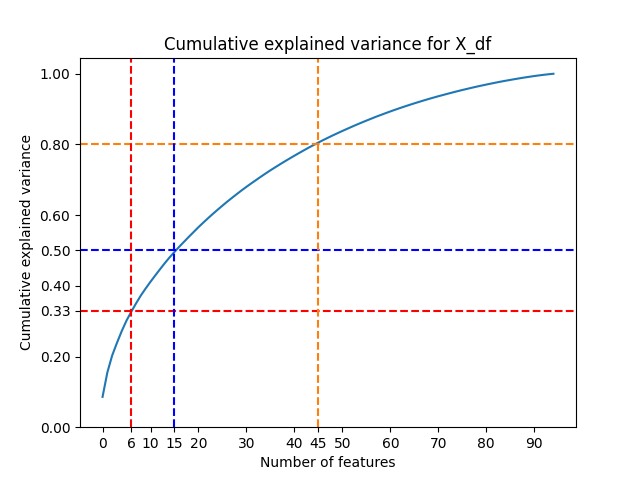

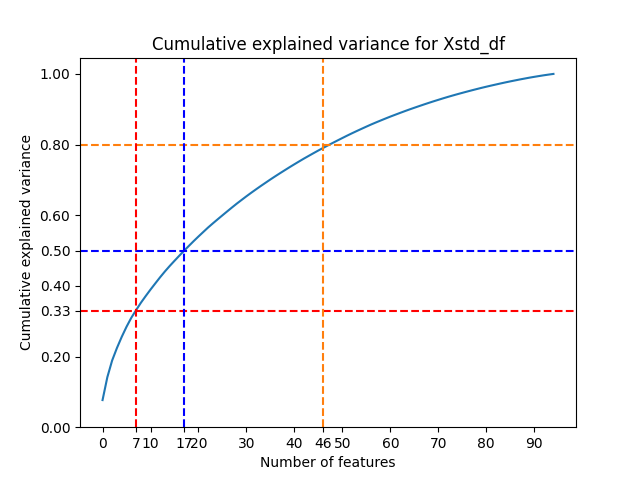

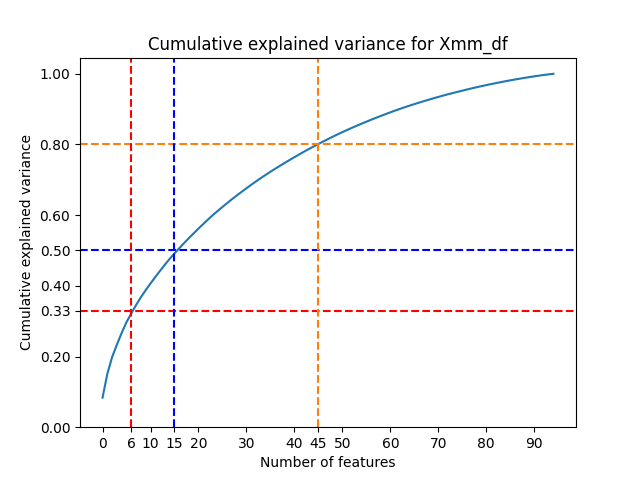

In [5]:
std_scaler=StandardScaler()
minmax_scaler=MinMaxScaler()

Xstd_scaled=std_scaler.fit_transform(X_df.values)
Xmm_scaled=minmax_scaler.fit_transform(X_df.values)

Xstd_df=pd.DataFrame(Xstd_scaled, columns=X_df.columns, index=X_df.index)
Xmm_df=pd.DataFrame(Xmm_scaled, columns=X_df.columns, index=X_df.index)

print("---     VARIANCE FOR X_df     ---")
print(X_df.var().sort_values())
print("---------------------------------")
print("---   VARIANCE FOR Xstd_df    ---")
print(Xstd_df.var().sort_values())
print("---------------------------------")
print("---    VARIANCE FOR Xmm_df    ---")
print(Xmm_df.var().sort_values())
print("---------------------------------")

pca=PCA()
std_pca=PCA()
mm_pca=PCA()

pca.fit(X_df.values)
std_pca.fit(Xstd_scaled)
mm_pca.fit(Xmm_scaled)

x_ticks = list(range(0,100,10))
y_ticks = list(np.arange(0, 1.1, 0.2)) + [0.33] + [0.5]

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(0.33, color='r', ls="--") #desired threshold
plt.axhline(0.5, color='b', ls="--") #comparison threshold
plt.axhline(0.8, color='C1', ls="--") 
plt.axvline(6, color='r', ls="--") #number of PCs to get the desired threshold
plt.axvline(15, color='b', ls="--") #number of PCs to get the comparison threshold
plt.axvline(45, color='C1', ls="--")
plt.yticks(y_ticks)
plt.xticks(x_ticks + [6] + [15] + [45])
plt.title("Cumulative explained variance for X_df")
plt.xlabel("Number of features")
plt.ylabel("Cumulative explained variance")
plt.show()

plt.figure()
plt.plot(np.cumsum(std_pca.explained_variance_ratio_))
plt.axhline(0.33, color='r', ls="--") #desired threshold
plt.axhline(0.5, color='b', ls="--") #comparison threshold
plt.axhline(0.8, color='C1', ls="--") 
plt.axvline(7, color='r', ls="--") #number of PCs to get the desired threshold
plt.axvline(17, color='b', ls="--") #number of PCs to get the comparison threshold
plt.axvline(46, color='C1', ls="--")
plt.yticks(y_ticks)
plt.xticks(x_ticks + [7] + [17] + [46])
plt.title("Cumulative explained variance for Xstd_df")
plt.xlabel("Number of features")
plt.ylabel("Cumulative explained variance")
plt.show()

plt.figure()
plt.plot(np.cumsum(mm_pca.explained_variance_ratio_))
plt.axhline(0.33, color='r', ls="--") #desired threshold
plt.axhline(0.5, color='b', ls="--") #comparison threshold
plt.axhline(0.8, color='C1', ls="--") 
plt.axvline(6, color='r', ls="--") #number of PCs to get the desired threshold
plt.axvline(15, color='b', ls="--") #number of PCs to get the comparison threshold
plt.axvline(45, color='C1', ls="--")
plt.yticks(y_ticks)
plt.xticks(x_ticks + [6] + [15] + [45])
plt.title("Cumulative explained variance for Xmm_df")
plt.xlabel("Number of features")
plt.ylabel("Cumulative explained variance")
plt.show()

**Variance of dataset's features:**

For each dataframe we have printed the variance of their columns in ascending order, and these show that:
1. **X_df:** we have a very high discrepancy between the highest variances (exceeding 2) and the lowest (all below 1). This is an issue with PCA, as features with the largest variances will dominate the analysis, so we will risk that meaningful features with low variance will be discarded in the PCA.
2. **Xstd_df:** here all the features have the same variance. This is obvious as the values in the columns have been standardized, so they are centered with mean 0 and they all have the same variance. However, this will cause that also the less important features will contribute with the same variance to the PCA, so it will be more difficult to obtain a high percentage of explained variance with few PCs
3. **Xmm_df:** this type of standardization is particularly suited for surveys, because the values of each feature are ranked. We can see that with 1 less feature we obtain the same variance of the standard scaled one. However, Min-Max scaler sometimes does not perform good with a great amount of features, so in the next steps we will check the comparison between the Min-Max scaled dataset and the Standard scaled one.

**Cumulative explained variance:**

For all the curves we have a pretty steep start, meaning that with few components we can retain a relatively high percentage of information, in fact by the blue dotted lines we can see that to retain the 50% we could use 15 or 17 features, depending on the dataframe, and those are less than the 18% of the original features. The curve does not have a proper elbow, so we cannot identify the best value number of features, but we can see that with 45 features, that are approximately half of the original features, we get roughly the 80% of variance, meaning that we got a slight improvement even though we added 30 features. However, we are interested in keeping the 33% of information with the smallest number of features possible, and this result is obtained with 6 features for X_df and Xmm_df, and 7 features for Xstd_df. The last one has the highest number of features needed to obtain the 33% threshold because, as already said previously, it gives the same importance to all the features, even the less meaningful one.

## Exercise 3. Dimensionality Reduction and PC Interpretation

In the cells below, do the following operations:
1. For each one of the two dataframes _Xstd_df_, and _Xmm_df_, compute a new PCA for performing a dimensionality reduction with respect to $m$ dimensions. The value of $m$ must be $$m = \min\{m', 5\}\,,$$ where $m'$ is the value required for obtaining $33\%$ of the total variance.
2. For both the cases, visualize all the PCs and give a name/interpretation to them. **Comment and motivate your interpretations**. If possible, **compare the differences among the results obtained** for _Xstd_df_ and _Xmm_df_.
3. Perform the score graph for both the cases (_std_ and _mm_). If $m>3$, plot the score graph with respect to the first 3 PCs. All the **plots must show the names of the PCs on the axes** for better understanding the results.
4. **Optional:** plot more score graphs, coloring the dots with respect to any label in the list _labels_ that you believe can be interesting. **Comment and analyze this optional plots**.

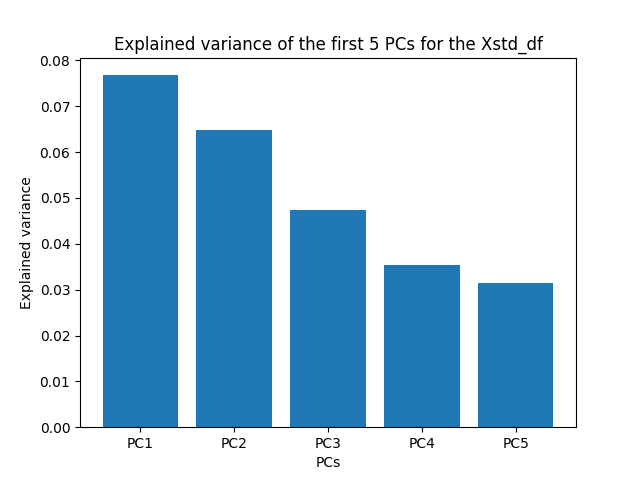

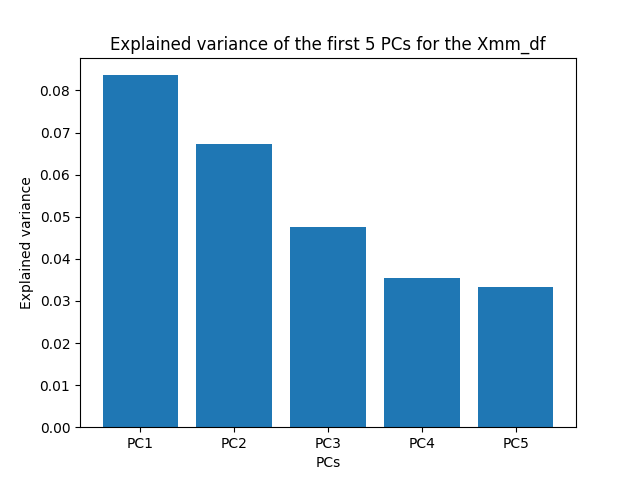

Explained variance of the first 5 PCs for the Xstd_df is: 0.255750922895186
Explained variance of the first 5 PCs for the Xmm_df is: 0.26725294835262026
--- Visualization of PCs for standard scaled dataset ---


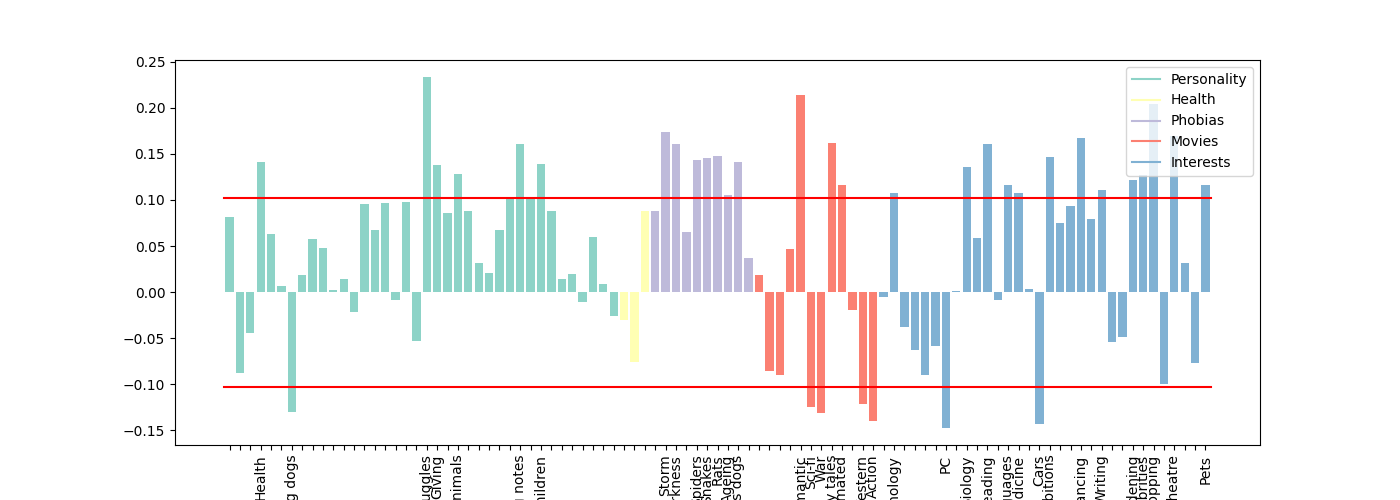


****************** PC1 **********************
HIGH-VALUED POSITIVE COMPONENTS: ['Health', 'Life struggles', 'Giving', 'Compassion to animals', 'Writing notes', 'Children', 'Storm', 'Darkness', 'Spiders', 'Snakes', 'Rats', 'Ageing', 'Dangerous dogs', 'Romantic', 'Fantasy/Fairy tales', 'Animated', 'Psychology', 'Biology', 'Reading', 'Foreign languages', 'Medicine', 'Art exhibitions', 'Dancing', 'Writing', 'Gardening', 'Celebrities', 'Shopping', 'Theatre', 'Pets']

HIGH-VALUED NEGATIVE COMPONENTS: ['Small - big dogs', 'Sci-fi', 'War', 'Western', 'Action', 'PC', 'Cars']
*********************************************



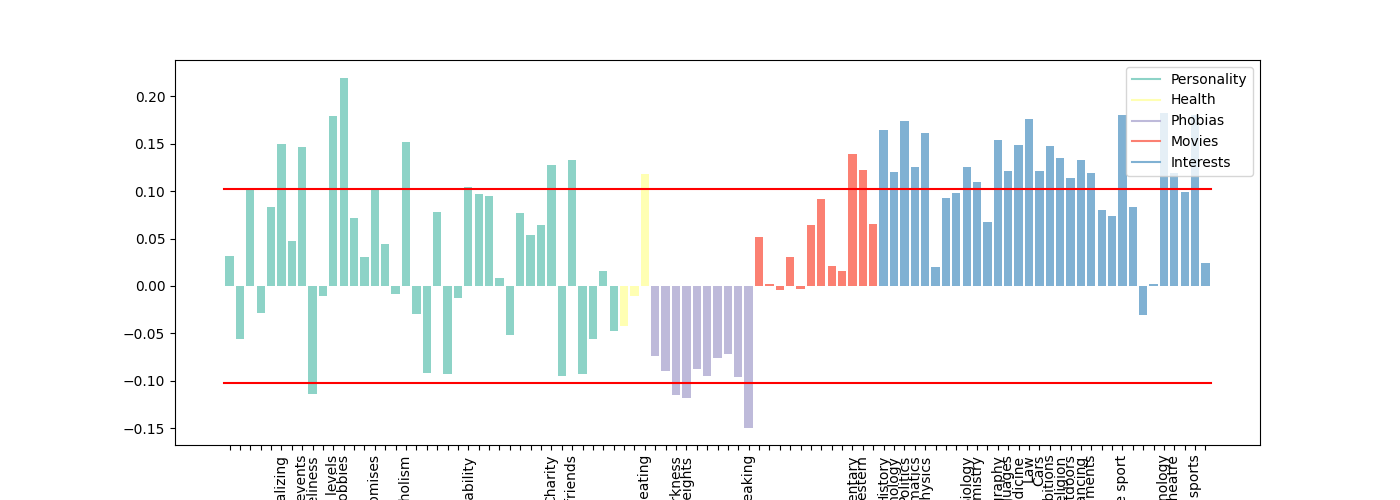


****************** PC2 **********************
HIGH-VALUED POSITIVE COMPONENTS: ['Socializing', 'Daily events', 'Energy levels', 'Interests or hobbies', 'Keeping promises', 'Workaholism', 'Reliability', 'Charity', 'Number of friends', 'Healthy eating', 'Documentary', 'Western', 'History', 'Psychology', 'Politics', 'Mathematics', 'Physics', 'Biology', 'Chemistry', 'Geography', 'Foreign languages', 'Medicine', 'Law', 'Cars', 'Art exhibitions', 'Religion', 'Countryside, outdoors', 'Dancing', 'Musical instruments', 'Active sport', 'Science and technology', 'Theatre', 'Adrenaline sports']

HIGH-VALUED NEGATIVE COMPONENTS: ['Loneliness', 'Darkness', 'Heights', 'Fear of public speaking']
*********************************************



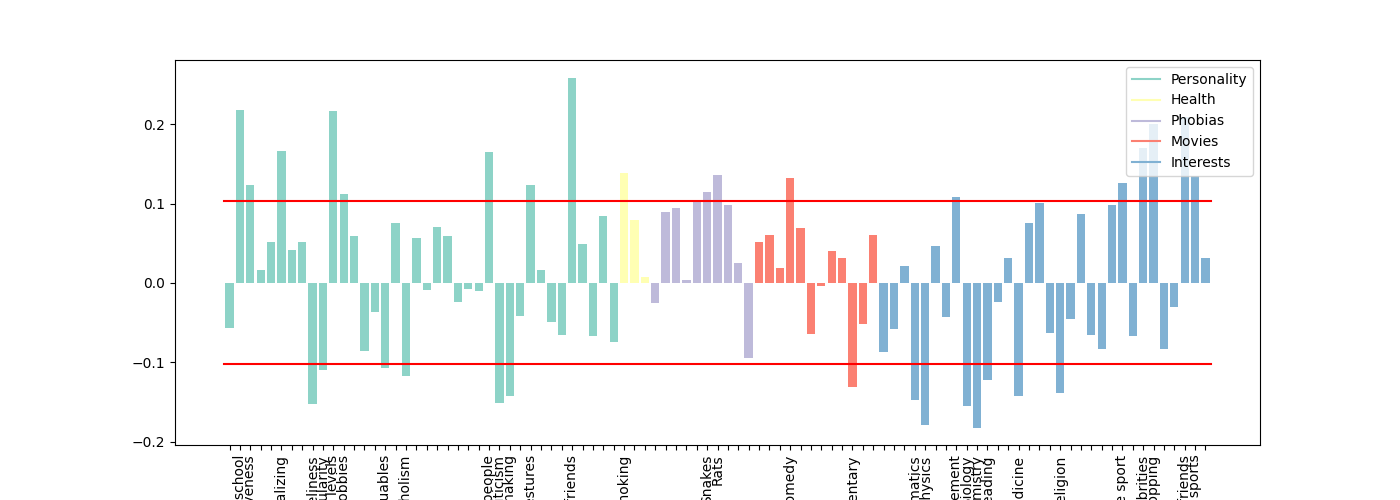


****************** PC3 **********************
HIGH-VALUED POSITIVE COMPONENTS: ['Cheating in school', 'Assertiveness', 'Socializing', 'Energy levels', 'Interests or hobbies', 'Knowing the right people', 'Appearence and gestures', 'Number of friends', 'Smoking', 'Snakes', 'Rats', 'Comedy', 'Economy Management', 'Active sport', 'Celebrities', 'Shopping', 'Fun with friends', 'Adrenaline sports']

HIGH-VALUED NEGATIVE COMPONENTS: ['Loneliness', 'Unpopularity', 'Finding lost valuables', 'Workaholism', 'Self-criticism', 'Decision making', 'Documentary', 'Mathematics', 'Physics', 'Biology', 'Chemistry', 'Reading', 'Medicine', 'Religion']
*********************************************



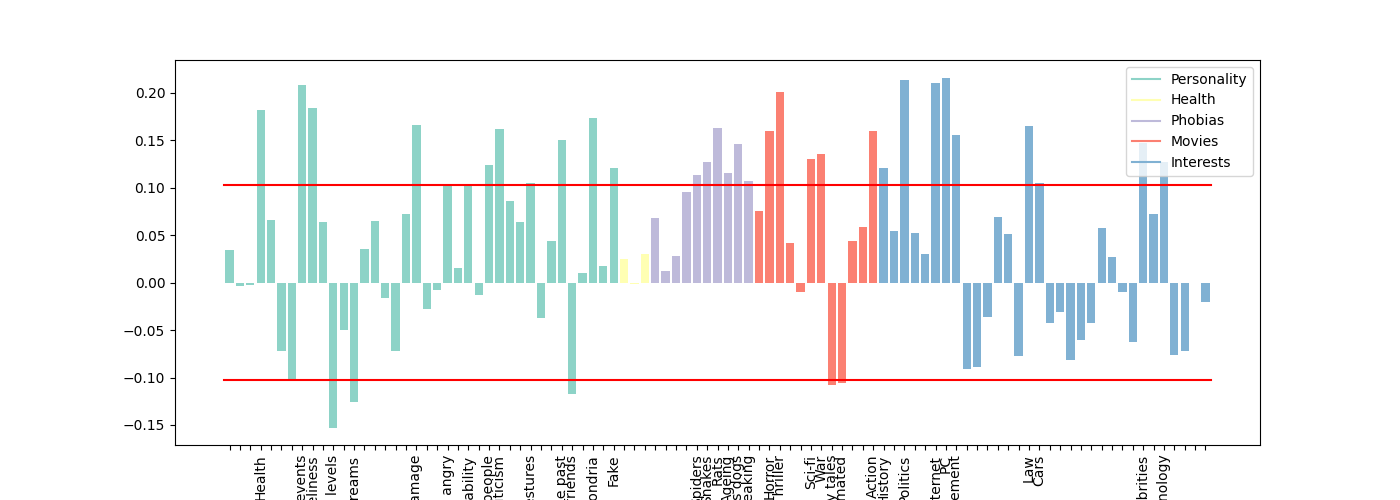


****************** PC4 **********************
HIGH-VALUED POSITIVE COMPONENTS: ['Health', 'Daily events', 'Loneliness', 'Criminal damage', 'Getting angry', 'Reliability', 'Knowing the right people', 'Self-criticism', 'Appearence and gestures', 'Changing the past', 'Hypochondria', 'Fake', 'Spiders', 'Snakes', 'Rats', 'Ageing', 'Dangerous dogs', 'Fear of public speaking', 'Horror', 'Thriller', 'Sci-fi', 'War', 'Action', 'History', 'Politics', 'Internet', 'PC', 'Economy Management', 'Law', 'Cars', 'Celebrities', 'Science and technology']

HIGH-VALUED NEGATIVE COMPONENTS: ['Energy levels', 'Dreams', 'Number of friends', 'Fantasy/Fairy tales', 'Animated']
*********************************************



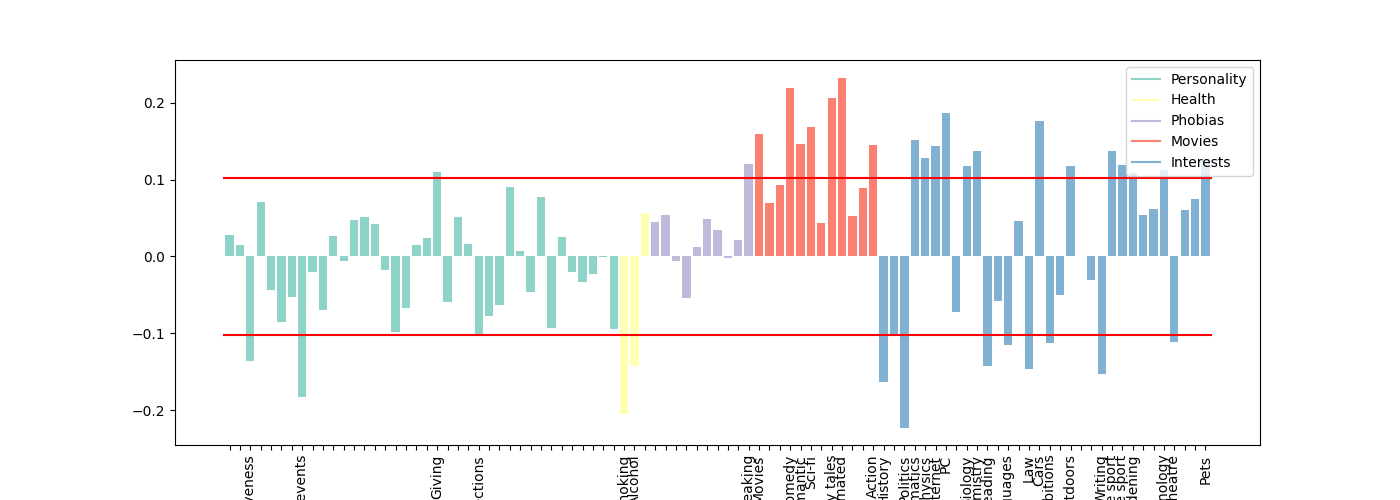


****************** PC5 **********************
HIGH-VALUED POSITIVE COMPONENTS: ['Giving', 'Fear of public speaking', 'Movies', 'Comedy', 'Romantic', 'Sci-fi', 'Fantasy/Fairy tales', 'Animated', 'Action', 'Mathematics', 'Physics', 'Internet', 'PC', 'Biology', 'Chemistry', 'Cars', 'Countryside, outdoors', 'Passive sport', 'Active sport', 'Gardening', 'Science and technology', 'Pets']

HIGH-VALUED NEGATIVE COMPONENTS: ['Assertiveness', 'Daily events', 'Elections', 'Smoking', 'Alcohol', 'History', 'Politics', 'Reading', 'Foreign languages', 'Law', 'Art exhibitions', 'Writing', 'Theatre']
*********************************************

--- Visualization of PCs for Min-Max scaled dataset ---


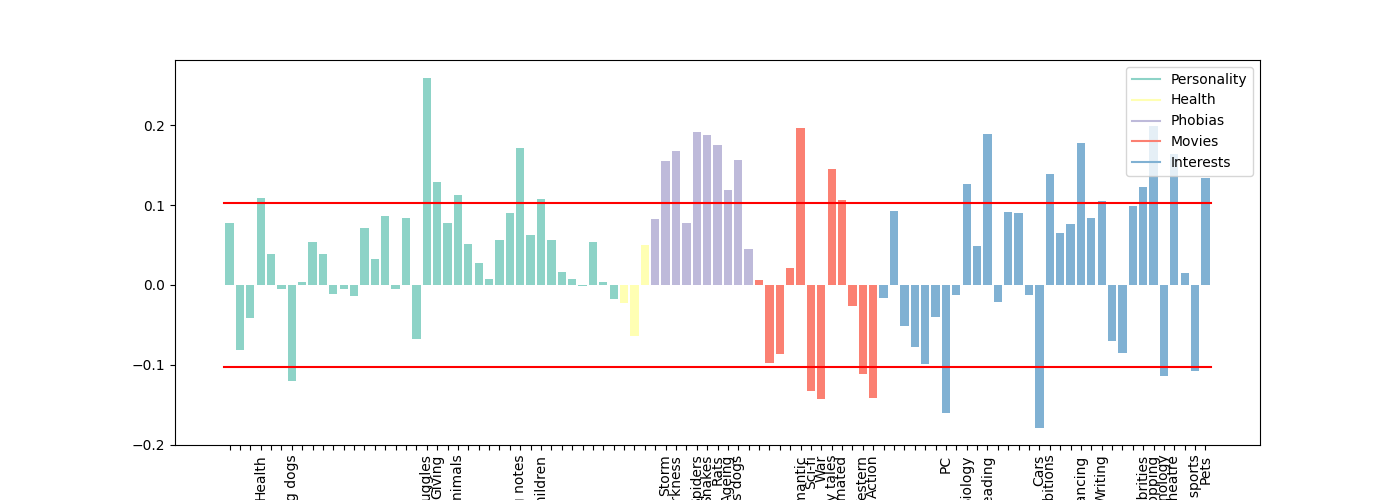


****************** PC1 **********************
HIGH-VALUED POSITIVE COMPONENTS: ['Health', 'Life struggles', 'Giving', 'Compassion to animals', 'Writing notes', 'Children', 'Storm', 'Darkness', 'Spiders', 'Snakes', 'Rats', 'Ageing', 'Dangerous dogs', 'Romantic', 'Fantasy/Fairy tales', 'Animated', 'Biology', 'Reading', 'Art exhibitions', 'Dancing', 'Writing', 'Celebrities', 'Shopping', 'Theatre', 'Pets']

HIGH-VALUED NEGATIVE COMPONENTS: ['Small - big dogs', 'Sci-fi', 'War', 'Western', 'Action', 'PC', 'Cars', 'Science and technology', 'Adrenaline sports']
*********************************************



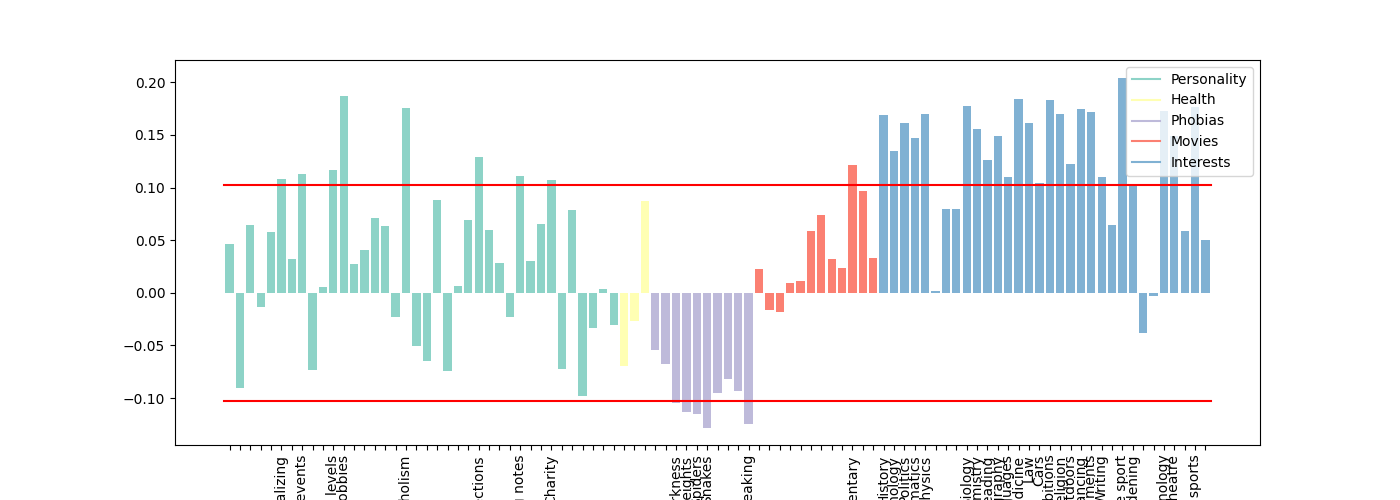


****************** PC2 **********************
HIGH-VALUED POSITIVE COMPONENTS: ['Socializing', 'Daily events', 'Energy levels', 'Interests or hobbies', 'Workaholism', 'Elections', 'Writing notes', 'Charity', 'Documentary', 'History', 'Psychology', 'Politics', 'Mathematics', 'Physics', 'Biology', 'Chemistry', 'Reading', 'Geography', 'Foreign languages', 'Medicine', 'Law', 'Cars', 'Art exhibitions', 'Religion', 'Countryside, outdoors', 'Dancing', 'Musical instruments', 'Writing', 'Active sport', 'Gardening', 'Science and technology', 'Theatre', 'Adrenaline sports']

HIGH-VALUED NEGATIVE COMPONENTS: ['Darkness', 'Heights', 'Spiders', 'Snakes', 'Fear of public speaking']
*********************************************



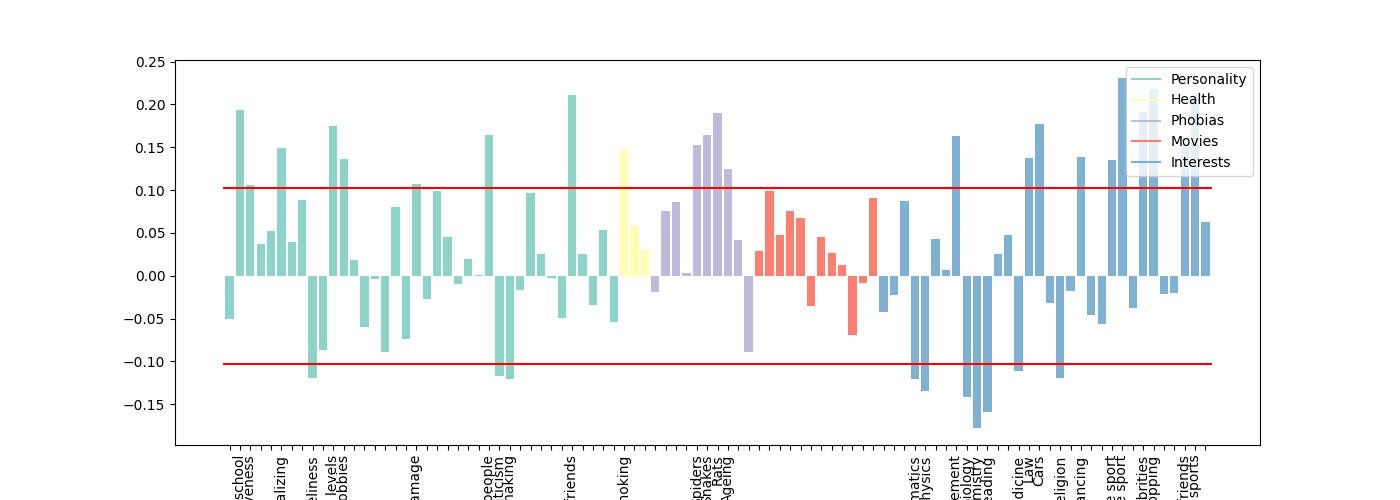


****************** PC3 **********************
HIGH-VALUED POSITIVE COMPONENTS: ['Cheating in school', 'Assertiveness', 'Socializing', 'Energy levels', 'Interests or hobbies', 'Criminal damage', 'Knowing the right people', 'Number of friends', 'Smoking', 'Spiders', 'Snakes', 'Rats', 'Ageing', 'Economy Management', 'Law', 'Cars', 'Dancing', 'Passive sport', 'Active sport', 'Celebrities', 'Shopping', 'Fun with friends', 'Adrenaline sports']

HIGH-VALUED NEGATIVE COMPONENTS: ['Loneliness', 'Self-criticism', 'Decision making', 'Mathematics', 'Physics', 'Biology', 'Chemistry', 'Reading', 'Medicine', 'Religion']
*********************************************



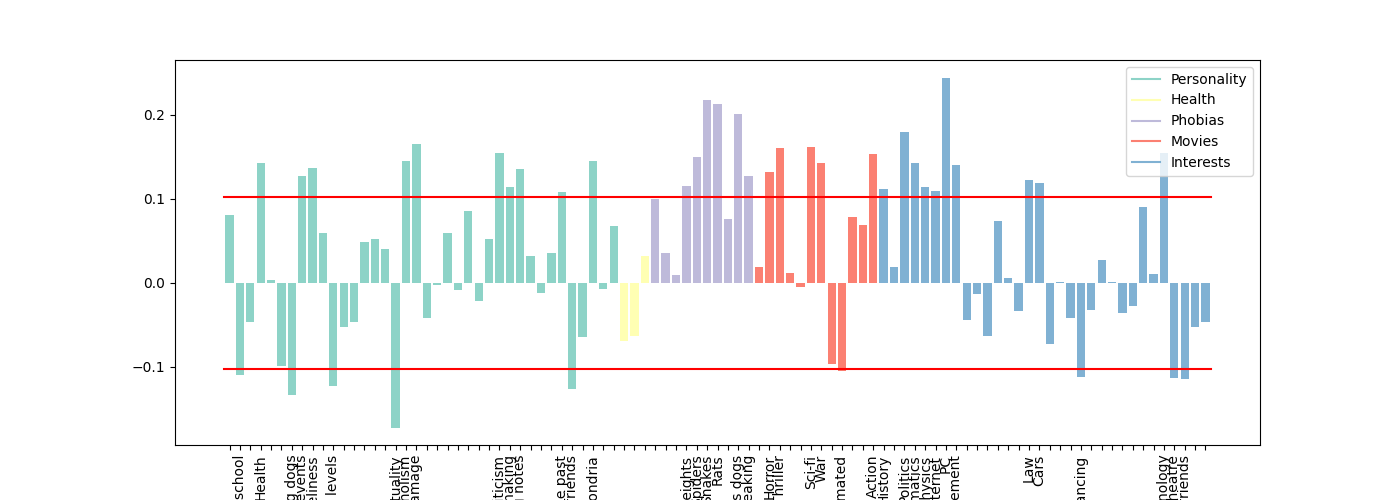


****************** PC4 **********************
HIGH-VALUED POSITIVE COMPONENTS: ['Health', 'Daily events', 'Loneliness', 'Workaholism', 'Criminal damage', 'Self-criticism', 'Decision making', 'Writing notes', 'Changing the past', 'Hypochondria', 'Heights', 'Spiders', 'Snakes', 'Rats', 'Dangerous dogs', 'Fear of public speaking', 'Horror', 'Thriller', 'Sci-fi', 'War', 'Action', 'History', 'Politics', 'Mathematics', 'Physics', 'Internet', 'PC', 'Economy Management', 'Law', 'Cars', 'Science and technology']

HIGH-VALUED NEGATIVE COMPONENTS: ['Cheating in school', 'Small - big dogs', 'Energy levels', 'Punctuality', 'Number of friends', 'Animated', 'Dancing', 'Theatre', 'Fun with friends']
*********************************************



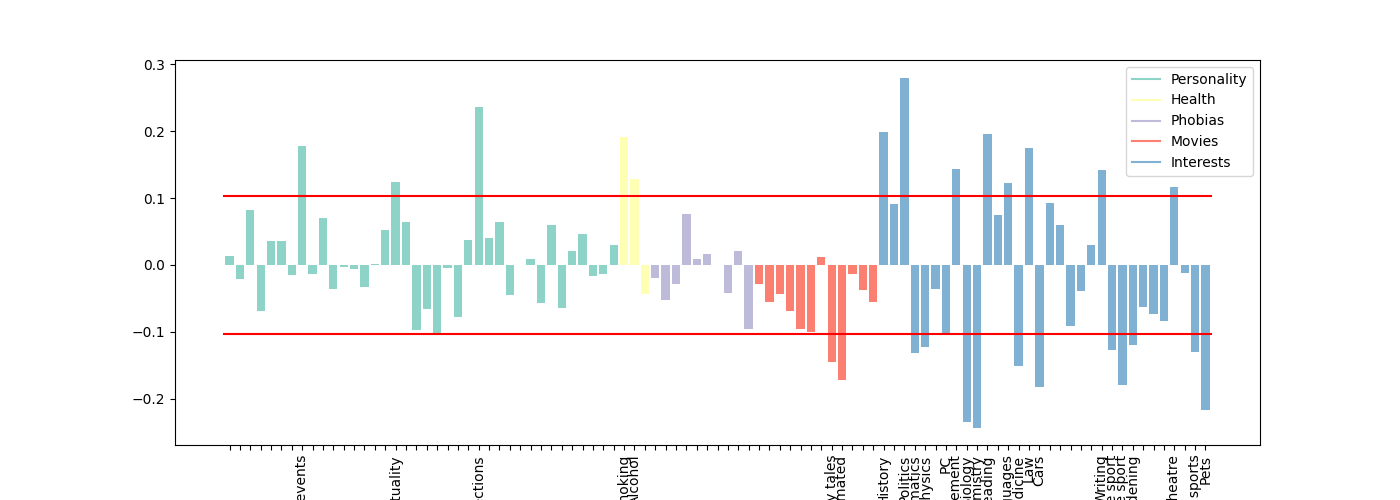


****************** PC5 **********************
HIGH-VALUED POSITIVE COMPONENTS: ['Daily events', 'Punctuality', 'Elections', 'Smoking', 'Alcohol', 'History', 'Politics', 'Economy Management', 'Reading', 'Foreign languages', 'Law', 'Writing', 'Theatre']

HIGH-VALUED NEGATIVE COMPONENTS: ['Fantasy/Fairy tales', 'Animated', 'Mathematics', 'Physics', 'PC', 'Biology', 'Chemistry', 'Medicine', 'Cars', 'Passive sport', 'Active sport', 'Gardening', 'Adrenaline sports', 'Pets']
*********************************************

SCORE GRAPH for Standard scaled dataset


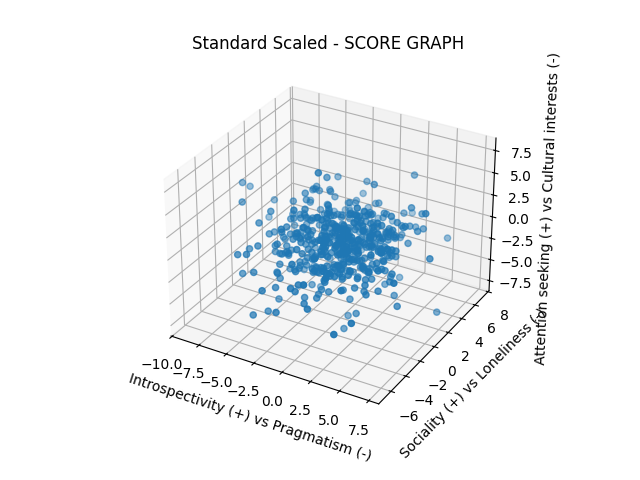

SCORE GRAPH for Min-Max scaled dataset


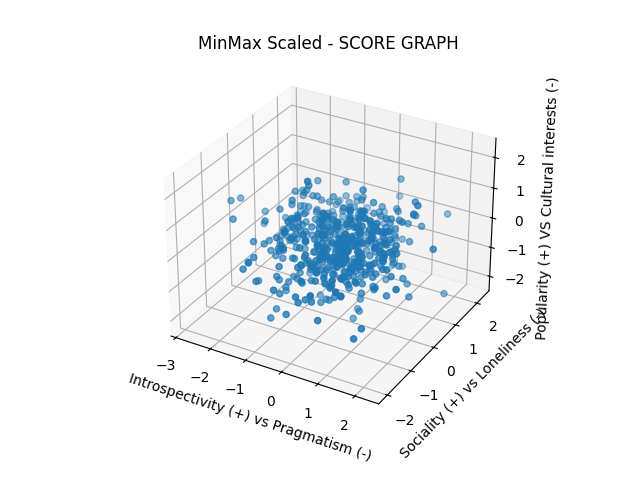

Male-Female SCORE GRAPH for Standard scaled dataset


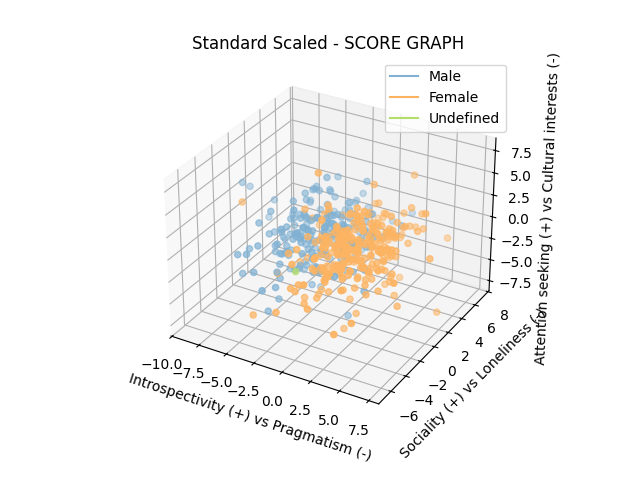

Male-Female SCORE GRAPH for Min-Max scaled dataset


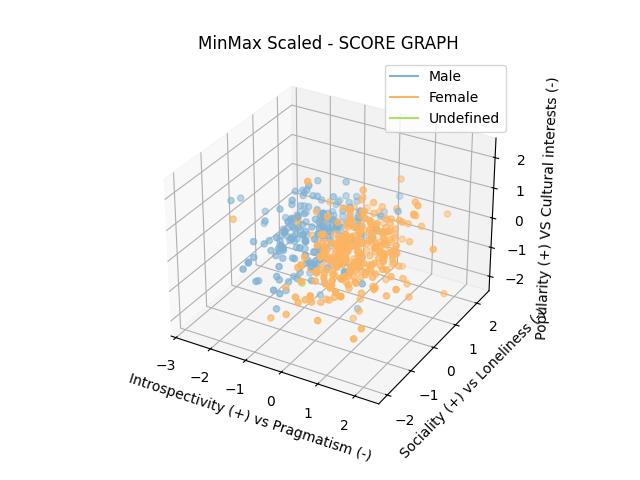

In [6]:
m=5 #for both the standardizations, as I'd need 7 or 6 pcs to achieve the 33% of explained variance ratio

std_pca=PCA(n_components=m)
mm_pca=PCA(n_components=m)

std_pca.fit(Xstd_scaled)
mm_pca.fit(Xmm_scaled)

plt.figure()
plt.bar(range(std_pca.explained_variance_ratio_.shape[0]),
        std_pca.explained_variance_ratio_)
plt.title("Explained variance of the first 5 PCs for the Xstd_df")
plt.xticks(range(5),labels=[f"PC{i}" for i in range(1,6)])
plt.ylabel("Explained variance")
plt.xlabel("PCs")
plt.show()

plt.figure()
plt.bar(range(mm_pca.explained_variance_ratio_.shape[0]),
        mm_pca.explained_variance_ratio_)
plt.xticks(range(5),labels=[f"PC{i}" for i in range(1,6)])
plt.title("Explained variance of the first 5 PCs for the Xmm_df")
plt.ylabel("Explained variance")
plt.xlabel("PCs")
plt.show()

print(f"Explained variance of the first 5 PCs for the Xstd_df is: {np.cumsum(std_pca.explained_variance_ratio_)[4]}")
print(f"Explained variance of the first 5 PCs for the Xmm_df is: {np.cumsum(mm_pca.explained_variance_ratio_)[4]}")

eps=1/np.sqrt(std_pca.n_features_in_)

set3 = cm.Set3.colors
type_colors = {
    'Personality': set3[0],
    'Health': set3[1],
    'Phobias': set3[2],
    'Movies': set3[3],
    'Interests': set3[4]
}
my_feat_types=[feat_type for feat in X_df.columns.to_list() 
               for feat_type in variables_by_type 
               if feat in variables_by_type[feat_type]]
features_color_types = [type_colors[val] for val in my_feat_types]

type_colors_legend = [Line2D([0], [0], color=type_colors[k]) 
                      for k in pd.Series(my_feat_types).unique()]

print("--- Visualization of PCs for standard scaled dataset ---", end="\n")
for i in range(m):

    ind_great_pos_PCi = np.argwhere(std_pca.components_[i, :] >= eps).flatten()
    ind_great_neg_PCi = np.argwhere(std_pca.components_[i, :] <= -eps).flatten()
    great_pos_PCi = [Xstd_df.columns[j] for j in ind_great_pos_PCi]
    great_neg_PCi = [Xstd_df.columns[j] for j in ind_great_neg_PCi]

    my_labels=[lab if lab in great_pos_PCi or lab in great_neg_PCi else "" 
               for lab in Xstd_df.columns.tolist()]

    plt.figure(figsize=(14,5))
    plt.bar(np.arange(std_pca.n_features_in_), std_pca.components_[i,:], 
            color=features_color_types)
    plt.plot([-0.5, std_pca.n_features_in_ - 0.5], [eps, eps], 'red')
    plt.plot([-0.5, std_pca.n_features_in_ - 0.5], [-eps, -eps], 'red')
    plt.xticks(ticks=np.arange(std_pca.n_features_in_), 
               labels=my_labels,
               rotation=90)
    plt.legend(type_colors_legend, pd.Series(my_feat_types).unique(), 
               loc="upper right")
    plt.show()

    print('')
    print(f'****************** PC{i+1} **********************')
    print(f'HIGH-VALUED POSITIVE COMPONENTS: {great_pos_PCi}')
    print('')
    print(f'HIGH-VALUED NEGATIVE COMPONENTS: {great_neg_PCi}')
    print('*********************************************')
    print('')

print("--- Visualization of PCs for Min-Max scaled dataset ---", end="\n")
for i in range(m):

    ind_great_pos_PCi = np.argwhere(mm_pca.components_[i, :] >= eps).flatten()
    ind_great_neg_PCi = np.argwhere(mm_pca.components_[i, :] <= -eps).flatten()
    great_pos_PCi = [Xmm_df.columns[j] for j in ind_great_pos_PCi]
    great_neg_PCi = [Xmm_df.columns[j] for j in ind_great_neg_PCi]

    my_labels=[lab if lab in great_pos_PCi or lab in great_neg_PCi else "" 
               for lab in Xmm_df.columns.tolist()]

    plt.figure(figsize=(14,5))
    plt.bar(np.arange(mm_pca.n_features_in_), mm_pca.components_[i,:], 
            color=features_color_types)
    plt.plot([-0.5, mm_pca.n_features_in_ - 0.5], [eps, eps], 'red')
    plt.plot([-0.5, mm_pca.n_features_in_ - 0.5], [-eps, -eps], 'red')
    plt.xticks(ticks=np.arange(mm_pca.n_features_in_), 
               labels=my_labels,
               rotation=90)
    plt.legend(type_colors_legend, pd.Series(my_feat_types).unique(), 
               loc="upper right")
    plt.show()

    print('')
    print(f'****************** PC{i+1} **********************')
    print(f'HIGH-VALUED POSITIVE COMPONENTS: {great_pos_PCi}')
    print('')
    print(f'HIGH-VALUED NEGATIVE COMPONENTS: {great_neg_PCi}')
    print('*********************************************')
    print('')

std_pc_names = ["Introspectivity (+) vs Pragmatism (-)",
                "Sociality (+) vs Loneliness (-)",
                "Attention seeking (+) vs Cultural interests (-)",
                "Fears (+) vs Creativity (-)",
                "Scientific topics (+) vs Humanities (-)"]

mm_pc_names = ["Introspectivity (+) vs Pragmatism (-)",
               "Sociality (+) vs Loneliness (-)",
               "Popularity (+) VS Cultural interests (-)",
               "Fears (+) VS Creativity (-)",
               "Humanities (+) vs Scientific topics (-)"]

Ystd = std_pca.transform(Xstd_scaled)
Ymm = mm_pca.transform(Xmm_scaled)

print("SCORE GRAPH for Standard scaled dataset")

sg_3d = plt.figure()
ax_sg_3d = sg_3d.add_subplot(111, projection='3d')
ax_sg_3d.scatter(Ystd[:, 0], Ystd[:, 1], Ystd[:, 2])
plt.title('Standard Scaled - SCORE GRAPH')
ax_sg_3d.set_xlabel(std_pc_names[0])
ax_sg_3d.set_ylabel(std_pc_names[1])
ax_sg_3d.set_zlabel(std_pc_names[2])
plt.grid()
plt.show()

print("SCORE GRAPH for Min-Max scaled dataset")

sg_3d = plt.figure()
ax_sg_3d = sg_3d.add_subplot(111, projection='3d')
ax_sg_3d.scatter(Ymm[:, 0], Ymm[:, 1], Ymm[:, 2])
plt.title('MinMax Scaled - SCORE GRAPH')
ax_sg_3d.set_xlabel(mm_pc_names[0])
ax_sg_3d.set_ylabel(mm_pc_names[1])
ax_sg_3d.set_zlabel(mm_pc_names[2])
plt.grid()
plt.show()

mf_colors_type = {"male": set3[4], "female": set3[5], np.nan: set3[6]}
mf_colors = [mf_colors_type[g] for g in df["Gender"].iloc[X_df.index]]
mf_colors_legend = [Line2D([0], [0], color=mf_colors_type[g]) 
                    for g in mf_colors_type.keys()]

print("Male-Female SCORE GRAPH for Standard scaled dataset")

sg_3d = plt.figure()
ax_sg_3d = sg_3d.add_subplot(111, projection='3d')
ax_sg_3d.scatter(Ystd[:, 0], Ystd[:, 1], Ystd[:, 2], c=mf_colors)
plt.title('Standard Scaled - SCORE GRAPH')
ax_sg_3d.set_xlabel(std_pc_names[0])
ax_sg_3d.set_ylabel(std_pc_names[1])
ax_sg_3d.set_zlabel(std_pc_names[2])
plt.legend(mf_colors_legend, ["Male","Female","Undefined"], loc="upper right")
plt.grid()
plt.show()

print("Male-Female SCORE GRAPH for Min-Max scaled dataset")

sg_3d = plt.figure()
ax_sg_3d = sg_3d.add_subplot(111, projection='3d')
ax_sg_3d.scatter(Ymm[:, 0], Ymm[:, 1], Ymm[:, 2], c=mf_colors)
plt.title('MinMax Scaled - SCORE GRAPH')
ax_sg_3d.set_xlabel(mm_pc_names[0])
ax_sg_3d.set_ylabel(mm_pc_names[1])
ax_sg_3d.set_zlabel(mm_pc_names[2])
plt.legend(mf_colors_legend, ["Male","Female","Undefined"], loc="upper right")
plt.grid()
plt.show()

## PCs Interpretation

We perform the dimensionality reduction using $m=5$ for both the dataframes, as in the previous analysis we have seen that we would need 6 PCs to obtain the $33\%$ of the total variance for the Xmm_df, and 7 PCs for the Xstd_df.
With this number of PCs we roughly retain the $25.6\%$ of information for Xstd_df and $26.7\%$ for Xmm_df, and the distribution of the explained variance among the 5 PCs can be seen in figure 4 and 5.
After this, we set a threshold $\epsilon = \sqrt{\frac{1}{n}}$, where n is the number of features, to identify what are the features that have the highest positive and negative contribution to each PC.
With this analysis we can try to give a name to each principal component for both the scaled datasets.

**Standard Scaled dataset:**
- **PC1:** It can be seen that between high valued positive components there are a lot of phobias, interests that require creativity and personality traits related to emotionality, while on the negative components we can see movies pretty much related to action and technology. To sum this up we call this component **Introspectivity vs Pragmatism**.
- **PC2:** Here between the positive components there are a lot of categories related to sociality, but also to intellectual interests, hobbies and sports, while on the negative part there are categories that remind of loneliness and insecurities. This component has been called **Sociality vs Loneliness**.
- **PC3:** In the positive part we can see a lot of features that refers to sociality, but mostly in terms of appearance, while in the negative part there are categories about unpopularity and loneliness, but above all interests about various topics. This PC is called **Attention seeking vs Cultural interests**.
- **PC4:** Between the positive categories we can see a lot of phobias related features, and also some other that give the sense of fears or anxiety, while in the negative part there are categories related to creativity and imagination. This is why this component has been called **Fears vs Creativity**.
- **PC5:** Here it can be seen that on the positive part there are mostly categories about movies and interests regarding scientific topics and sports, while on the negative part there are mostly interests about humanities topics. Because of that this PC is called **Scientific topics vs Humanities**.

**Min-Max Scaled dataset:**
- **PC1:** The features with high valued positive and negative components are pretty much the same of those that can be seen in the Standard Scaled dataset, so the name given to this PC is the same: **Empathy and Introspectivity**.
- **PC2:** Also in this case the components are pretty much similar, there are few different ones in the positive part, but the name given is the same as the PC2 of the Standard Scaled dataset, which is **Sociality vs Loneliness**.
- **PC3:** In this PC we can see a slightly difference from the corresponding one in the previous dataset, in fact in the features there seems to be less attention to pure appearance, but still there are some categories regarding popularity, while the negative part is pretty much the same as for the previous dataset. To underline this weak difference in the positive part we name this PC a little bit differently from the corresponding one of the previous dataset, the name given is **Popularity vs Cultural interests**.
- **PC4:** Also for this PC the analysis is pretty much the same as the one carried out in the previous dataset, so the name given to this PC is **Fears vs Creativity**.
- **PC5:** Here we can see a switch from the previous dataset component, in fact, we can see that in the positive part there are categories regarding humanities topics, while in the negative part there are the most scientific ones. The name for this component is **Humanities vs Scientific topics**

It can be seen that the Standard Scaled dataset and the Min-Max Scaled share very similar features between the PCs, a part from PC3, that has a slightly difference in the positive part, and in PC5, where the positive and negative part seem switched between the datasets.

**Further Plots:**

To analyze the distribution of the survey population we decided to plot the responses according to the gender of people. From the score graph we can see that there is a pretty neat distribution of male and female population along the PC1 axis, the one called **Introspectivity vs Pragmatism**. We can see that male are in majority placed in the negative part of the axis, so they show a more pragmatic behavior, while female are in the positive part, showing a better introspectivity. Along the other axes there cannot be seen an appreciable distributions by genders.

Further score graphs for other demographics have been plotted but their labels did not show any significant separation alongside the axes, so they have not been reported.

## Exercise 4. $k$-Means

In the cells below, do the following operations:
1. For each one of the two datasets (_std_ and _mm_), run the $k$-Means for clustering the data. In particular, **use the silohuette score for identify the best value for $k\in\{3, \ldots, 10\}$**.
2. Plot the score graphs of exercise 3.3, adding the centroids of the cluster.
3. Observing the centroids coordinates in the PC space, **give a name/interpretation to them**, exploiting the names you assigned to the PCs. **Comment and motivate your interpretations**.

****************** START k-MEANS WITH k=3 ******************
Computing...
****************** END k-MEANS WITH k=3 ******************

****************** START k-MEANS WITH k=4 ******************
Computing...
****************** END k-MEANS WITH k=4 ******************

****************** START k-MEANS WITH k=5 ******************
Computing...
****************** END k-MEANS WITH k=5 ******************

****************** START k-MEANS WITH k=6 ******************
Computing...
****************** END k-MEANS WITH k=6 ******************

****************** START k-MEANS WITH k=7 ******************
Computing...
****************** END k-MEANS WITH k=7 ******************

****************** START k-MEANS WITH k=8 ******************
Computing...
****************** END k-MEANS WITH k=8 ******************

****************** START k-MEANS WITH k=9 ******************
Computing...
****************** END k-MEANS WITH k=9 ******************

****************** START k-MEANS WITH k=10 ******************


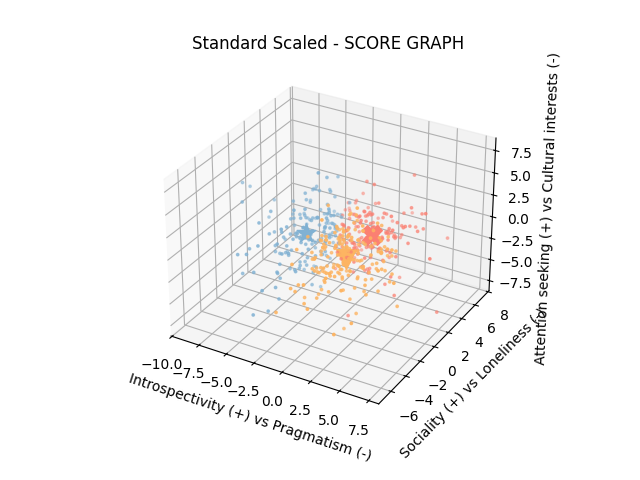

SCORE GRAPH with centroids for minmax scaled dataset


C:\Users\galan\AppData\Local\Temp\ipykernel_8320\1093277530.py:78: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  sg_3d = plt.figure()


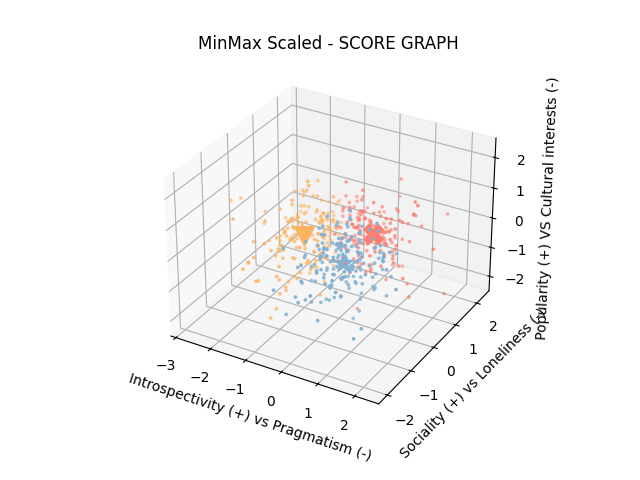

Standard Scaled centroids positions
[[ 1.21357341  2.38492476 -0.46567786]
 [-3.00836295 -0.17058017  0.10105333]
 [ 1.72181892 -1.89472448  0.30767923]]
Min-Max Scaled centroids positions
[[ 0.44607494  0.73279856 -0.01539557]
 [ 0.54246622 -0.6518649   0.02300152]
 [-0.96869997 -0.03952193 -0.00852916]]


In [7]:
km_list = []
silcoeff_list = []
k_list = list(range(3, 11))

for i in range(len(k_list)):
    print(f'****************** START k-MEANS WITH k={k_list[i]} ******************')
    print('Computing...')
    km_list.append(KMeans(n_clusters=k_list[i], random_state=random_seed))
    km = km_list[i]
    km.fit(Ystd)
    silcoeff_list.append(silhouette_score(Ystd, km.labels_))
    print(f'****************** END k-MEANS WITH k={k_list[i]} ******************')
    print('')

i_best = np.argmax(silcoeff_list)
k = k_list[i_best]
std_km = km_list[i_best]
std_centroids=std_km.cluster_centers_

print('')
print('****************** RESULTS OF THE SEARCH... ******************')
print(f'BEST SILHOUETTE SCORE: {np.max(silcoeff_list[i_best])} --> k = {k}')
print('**************************************************************')
print('')
print('')

##################################################################################

km_list = []
silcoeff_list = []
k_list = list(range(3, 11))

for i in range(len(k_list)):
    print(f'****************** START k-MEANS WITH k={k_list[i]} ******************')
    print('Computing...')
    km_list.append(KMeans(n_clusters=k_list[i], random_state=random_seed))
    km = km_list[i]
    km.fit(Ymm)
    silcoeff_list.append(silhouette_score(Ymm, km.labels_))
    print(f'****************** END k-MEANS WITH k={k_list[i]} ******************')
    print('')

i_best = np.argmax(silcoeff_list)
k = k_list[i_best]
mm_km = km_list[i_best]
mm_centroids = mm_km.cluster_centers_

print('')
print('****************** RESULTS OF THE SEARCH... ******************')
print(f'BEST SILHOUETTE SCORE: {np.max(silcoeff_list[i_best])} --> k = {k}')
print('**************************************************************')
print('')
print('')


print("SCORE GRAPH with centroids for Standard scaled dataset")

std_colors = [set3[i+3] for i in std_km.labels_]
sg_3d = plt.figure()
ax_sg_3d = sg_3d.add_subplot(111, projection='3d')
ax_sg_3d.scatter(Ystd[:, 0], Ystd[:, 1], Ystd[:, 2], s=3, c=std_colors)
ax_sg_3d.scatter(std_centroids[0,0], std_centroids[0,1], std_centroids[0,2], 
                 marker='X', s=200, color=set3[3])
ax_sg_3d.scatter(std_centroids[1,0], std_centroids[1,1], std_centroids[1,2], 
                 marker='*', s=200, color=set3[4])
ax_sg_3d.scatter(std_centroids[2,0], std_centroids[2,1], std_centroids[2,2], 
                 marker='v', s=200, color=set3[5])
plt.title('Standard Scaled - SCORE GRAPH')
ax_sg_3d.set_xlabel(std_pc_names[0])
ax_sg_3d.set_ylabel(std_pc_names[1])
ax_sg_3d.set_zlabel(std_pc_names[2])
plt.grid()
plt.show()

print("SCORE GRAPH with centroids for minmax scaled dataset")

mm_colors = [set3[i+3] for i in mm_km.labels_]
sg_3d = plt.figure()
ax_sg_3d = sg_3d.add_subplot(111, projection='3d')
ax_sg_3d.scatter(Ymm[:, 0], Ymm[:, 1], Ymm[:, 2], s=3, c=mm_colors)
ax_sg_3d.scatter(mm_centroids[0,0], mm_centroids[0,1], mm_centroids[0,2], 
                 marker='X', s=200, color=set3[3])
ax_sg_3d.scatter(mm_centroids[1,0], mm_centroids[1,1], mm_centroids[1,2], 
                 marker='*', s=200, color=set3[4])
ax_sg_3d.scatter(mm_centroids[2,0], mm_centroids[2,1], mm_centroids[2,2], 
                 marker='v', s=200, color=set3[5])
plt.title('MinMax Scaled - SCORE GRAPH')
ax_sg_3d.set_xlabel(mm_pc_names[0])
ax_sg_3d.set_ylabel(mm_pc_names[1])
ax_sg_3d.set_zlabel(mm_pc_names[2])
plt.grid()
plt.show()

print("Standard Scaled centroids positions")
print(std_centroids[:,:3])
print("Min-Max Scaled centroids positions")
print(mm_centroids[:,:3])

std_centroids_names = ["Building strong relationships", 
                       "Pragmatism", "Introspectivity and loneliness"]
mm_centroids_names = ["Building strong relationships", 
                      "Introspectivity and loneliness", "Pragmatism"]

## Centroids interpretation

As it can be seen by the silhouette score evaluation, the best $K-means$ clustering is the one with k=3 clusters for both the datasets.
By plotting and printing the positions of the centroids (respectively to the first three PCs), we could try to give them an interpretation.

**Standard Scaled dataset:**
1. This centroid has positive values for the first two PCs, with the second one being relatively high, and a negative value for the third one. We could say that this centroid identifies clusters of introspective people, with a high interest regarding social life, and some slight interests in culture. This cluster can be summed up as **Building strong relationships**. In the plots this centroid is represented by the **X** symbol.
2. The second centroids has the second and third PCs with values close to 0, but a high negative value for the first PC, meaning that this cluster represents pragmatic people. This centroid is named **Pragmatism**. In the plots this centroid is represented by the **\*** symbol.
3. The third centroid has a high positive value for the first PC, a high negative value for the second PC, and a slightly positive value for the third PC. We could say that people in this cluster are much introspective, that they feel lonely, and they are also kind of attention seeker people. To sum this up, we call this centroid **Introspectivity and loneliness**. In the plots this centroid is represented by the **V** symbol.

**Min-Max Scaled dataset:**
The centroids for this clustering have very similar positions compared to those of the Standard scaled dataset, but the second and third are switched between the two datasets.
1. We call this centroid **Building strong relationships**, because it has positive values for the first two PCs, with the second one being relatively high, and the third one being slightly negative, just like the first centroid of the previous clustering. In the plots this centroid is represented by the **X** symbol.
2. The second centroid for this dataset is very similar to the third one of the previous dataset, as the first PC has a positive value, the second PC has a negative value, and the third one has a very low positive value. We call this centroid **Introspectivity and loneliness**. In the plots this centroid is represented by the **\*** symbol.
3. This centroid has similar values to the second one of the clustering of the Standard scaled dataset, in fact we can see that the second and third PCs have very low values, close to zero, while the first PC has a high negative value. we call this centroid **Pragmatism** too. In the plots this centroid is represented by the **V** symbol.

## Exercise 5. Cluster Evaluations

In the cells below, do the following operations:
1. For each one of the two datasets (_std_ and _mm_), perform an **external evaluation** of the clustering obtained at exercise 4.1 with respect to one or more labels in the list _labels_. **Comment the results, comparing the evaluation with the interpretation you gave at exercise 4.3**. 
2. For each one of the two datasets (_std_ and _mm_), perform an **internal evaluation** of each cluster, with respect to the silohuette score. **Comment the results**. 

EXTERNAL EVALUATION
Male-Female SCORE GRAPH for Standard scaled dataset


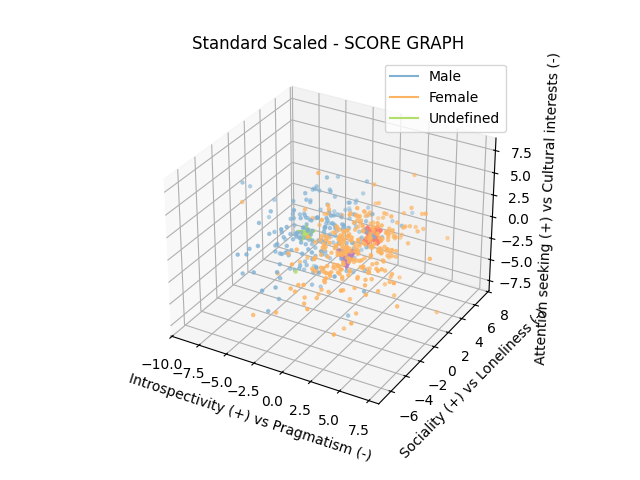

Male-Female SCORE GRAPH for Min-Max scaled dataset


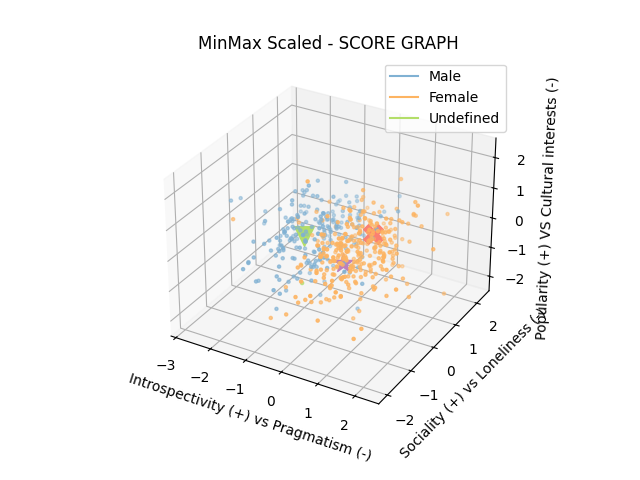

INTERNAL EVALUATION
Average silhouette score for Xstd_df is: 0.1778194046476945
Silhouette plot for Xstd_df
Average silhouette score for Xmm_df is: 0.1834922963033195
Silhouette plot for Xmm_df


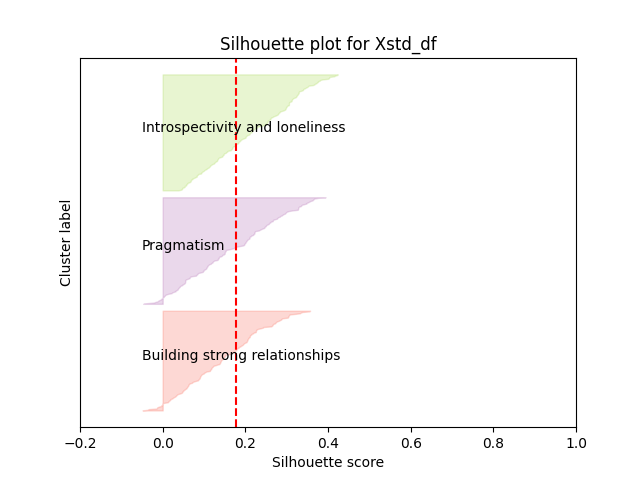

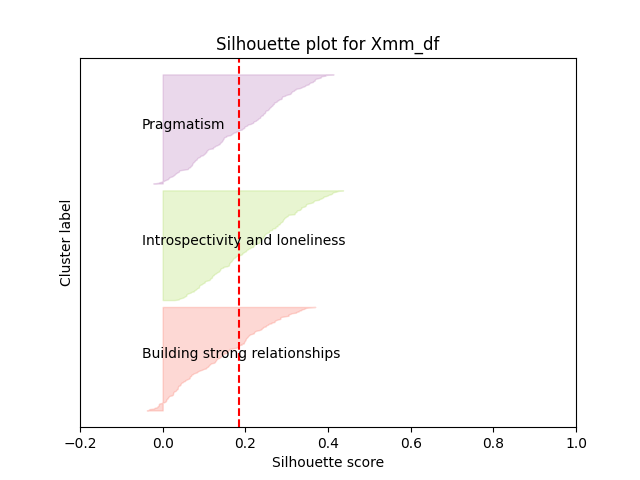

In [8]:
print("EXTERNAL EVALUATION")
    
print("Male-Female SCORE GRAPH for Standard scaled dataset")

sg_3d = plt.figure()
ax_sg_3d = sg_3d.add_subplot(111, projection='3d')
ax_sg_3d.scatter(Ystd[:, 0], Ystd[:, 1], Ystd[:, 2], s=5, c=mf_colors)
ax_sg_3d.scatter(std_centroids[0,0], std_centroids[0,1], std_centroids[0,2], 
                 marker='X', s=200, color=set3[3])
ax_sg_3d.scatter(std_centroids[1,0], std_centroids[1,1], std_centroids[1,2], 
                 marker='*', s=200, color=set3[6])
ax_sg_3d.scatter(std_centroids[2,0], std_centroids[2,1], std_centroids[2,2], 
                 marker='v', s=200, color=set3[9])
plt.title('Standard Scaled - SCORE GRAPH')
ax_sg_3d.set_xlabel(std_pc_names[0])
ax_sg_3d.set_ylabel(std_pc_names[1])
ax_sg_3d.set_zlabel(std_pc_names[2])
plt.legend(mf_colors_legend, ["Male","Female","Undefined"], loc="upper right")
plt.grid()
plt.show()

print("Male-Female SCORE GRAPH for Min-Max scaled dataset")

sg_3d = plt.figure()
ax_sg_3d = sg_3d.add_subplot(111, projection='3d')
ax_sg_3d.scatter(Ymm[:, 0], Ymm[:, 1], Ymm[:, 2], s=5, c=mf_colors)
ax_sg_3d.scatter(mm_centroids[0,0], mm_centroids[0,1], mm_centroids[0,2], 
                 marker='X', s=200, color=set3[3])
ax_sg_3d.scatter(mm_centroids[1,0], mm_centroids[1,1], mm_centroids[1,2], 
                 marker='*', s=200, color=set3[9])
ax_sg_3d.scatter(mm_centroids[2,0], mm_centroids[2,1], mm_centroids[2,2], 
                 marker='v', s=200, color=set3[6])
plt.title('MinMax Scaled - SCORE GRAPH')
ax_sg_3d.set_xlabel(mm_pc_names[0])
ax_sg_3d.set_ylabel(mm_pc_names[1])
ax_sg_3d.set_zlabel(mm_pc_names[2])
plt.legend(mf_colors_legend, ["Male","Female","Undefined"], loc="upper right")
plt.grid()
plt.show()

print("INTERNAL EVALUATION")

std_sil_score = silhouette_score(Ystd, std_km.labels_)
print(f"Average silhouette score for Xstd_df is: {std_sil_score}")

print("Silhouette plot for Xstd_df")
all_silhouette_score = silhouette_samples(Ystd,std_km.labels_)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
y_lower = 10
colors = [set3[3],set3[9],set3[6]]
for i in range(3):
    ith_cluster_silhouette_values = all_silhouette_score[std_km.labels_ == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    ax.fill_betweenx(np.arange(y_lower,y_upper),0,
                     ith_cluster_silhouette_values,facecolor=colors[i],
                     edgecolor=colors[i],alpha=0.3)
    ax.text(-0.05,y_lower + 0.5 * size_cluster_i,std_centroids_names[i])
    y_lower = y_upper + 10 
ax.set_title("Silhouette plot for Xstd_df")
ax.set_xlabel("Silhouette score")
ax.set_ylabel("Cluster label")
ax.axvline(x=std_sil_score,color="red",linestyle="--")
ax.set_yticks([])
ax.set_xticks(np.arange(-0.2,1.1,0.2))

mm_sil_score = silhouette_score(Ymm, mm_km.labels_)
print(f"Average silhouette score for Xmm_df is: {mm_sil_score}")

print("Silhouette plot for Xmm_df")
all_silhouette_score = silhouette_samples(Ymm,mm_km.labels_)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
y_lower = 10
colors = [set3[3],set3[6],set3[9]]
for i in range(3):
    ith_cluster_silhouette_values = all_silhouette_score[mm_km.labels_ == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    ax.fill_betweenx(np.arange(y_lower,y_upper),0,
                     ith_cluster_silhouette_values,facecolor=colors[i],
                     edgecolor=colors[i],alpha=0.3)
    ax.text(-0.05,y_lower + 0.5 * size_cluster_i,mm_centroids_names[i])
    y_lower = y_upper + 10 
ax.set_title("Silhouette plot for Xmm_df")
ax.set_xlabel("Silhouette score")
ax.set_ylabel("Cluster label")
ax.axvline(x=mm_sil_score,color="red",linestyle="--")
ax.set_yticks([])
ax.set_xticks(np.arange(-0.2,1.1,0.2))

## Clustering external and internal evaluations

**External evaluation:**
Here we plotted the same two score graphs plotted before, that is, the dataset divided by gender labels. As already noted before, there is a pretty neat division along the axis of the first PC for both the datasets, with mostly males in the negative part of the axis, while females are in the positive part. Having now plotted the centroids in the score graph, we can also add to our analysis the fact that the male population clusters near the **Pragmatism** centroid. Also, a good part of the female population sits near the **Introspectivity and Loneliness** centroid, and it was not easy to get this idea from the previous plot of the score graphs, because this is an information mostly given by the position of the centroid. For the **Building strong relationships** centroid we can also see a majority of female population, but there are also some points belonging to the male population very near to the centroid.

**Internal evaluation:**
The average silhouette score is pretty low for both the datasets, in fact an average silhouette score close to 0 means that clusters have very overlapping boundaries.
By the silhouette plot we can see that the points are quite evenly balanced between the three clusters, and this is shown by the height of the silhouette plot for each clusters. 
The best clusters are **Introspectivity and loneliness** clusters for both dataset, whose silhouette scores vary approximately from 0.05 to 0.43.
**Pragmatism** clusters are also relatively good, as most of the points are above the average silhouette score.
**Building strong relationships** are the worse clusters, as the majority of the points have silhouette scores below the threshold of the average one. This confirms also the difficulty of getting a neat division in the previously performed external evaluation for this cluster.